# Driver Insomnia Detection using Face Expression
## The libraries needed for the project:

### OpenCV, Numpy, Dlib, imutils

In [12]:
import cv2
# Importing OpenCV Library for basic image processing functions
import numpy as np
# Numpy array for related functions
import dlib
#Dlib for deep learning based Modules and face landmark detections
from imutils import face_utils
#We import for face_utils for basic operations of conversion

In [13]:
cap = cv2.VideoCapture(0)
# Initializing the camera for video capture

In [14]:
# Initializing Face Detector and Landmark Detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

### get_frontal_face_detector()
The *get_frontal_face_detector()* function is a part of the dlib library, which is a popular open-source library for machine learning and computer vision tasks. In particular, *the get_frontal_face_detector()* function is used for obtaining a pre-trained face detector specifically designed for detecting frontal faces in images.

When you call *get_frontal_face_detector()*, it returns an instance of the face detector object, which can then be used to detect faces in images or video frames. The face detector is based on the Histogram of Oriented Gradients (HOG) feature descriptor combined with a linear classifier

### shape_predictor()
In the dlib library, the *shape_predictor function* is used to load a trained shape predictor model for facial landmark detection. Facial landmarks are specific points on a face, such as the corners of the eyes, nose, mouth, and chin. These landmarks provide crucial information for various computer vision tasks, including face recognition, emotion analysis, and drowsiness detection.In the above code snippet, *shape_predictor_68_face_landmarks.dat* is the file containing the pre-trained shape predictor model. 


After loading the shape predictor model using dlib.shape_predictor, the code detects faces in an image using dlib.get_frontal_face_detector(). Then, for each detected face, the facial landmarks are predicted using the predictor object. The landmarks can be processed or used for further analysis based on your specific requirements.


#### shape_predictor_68_face_landmarks.dat

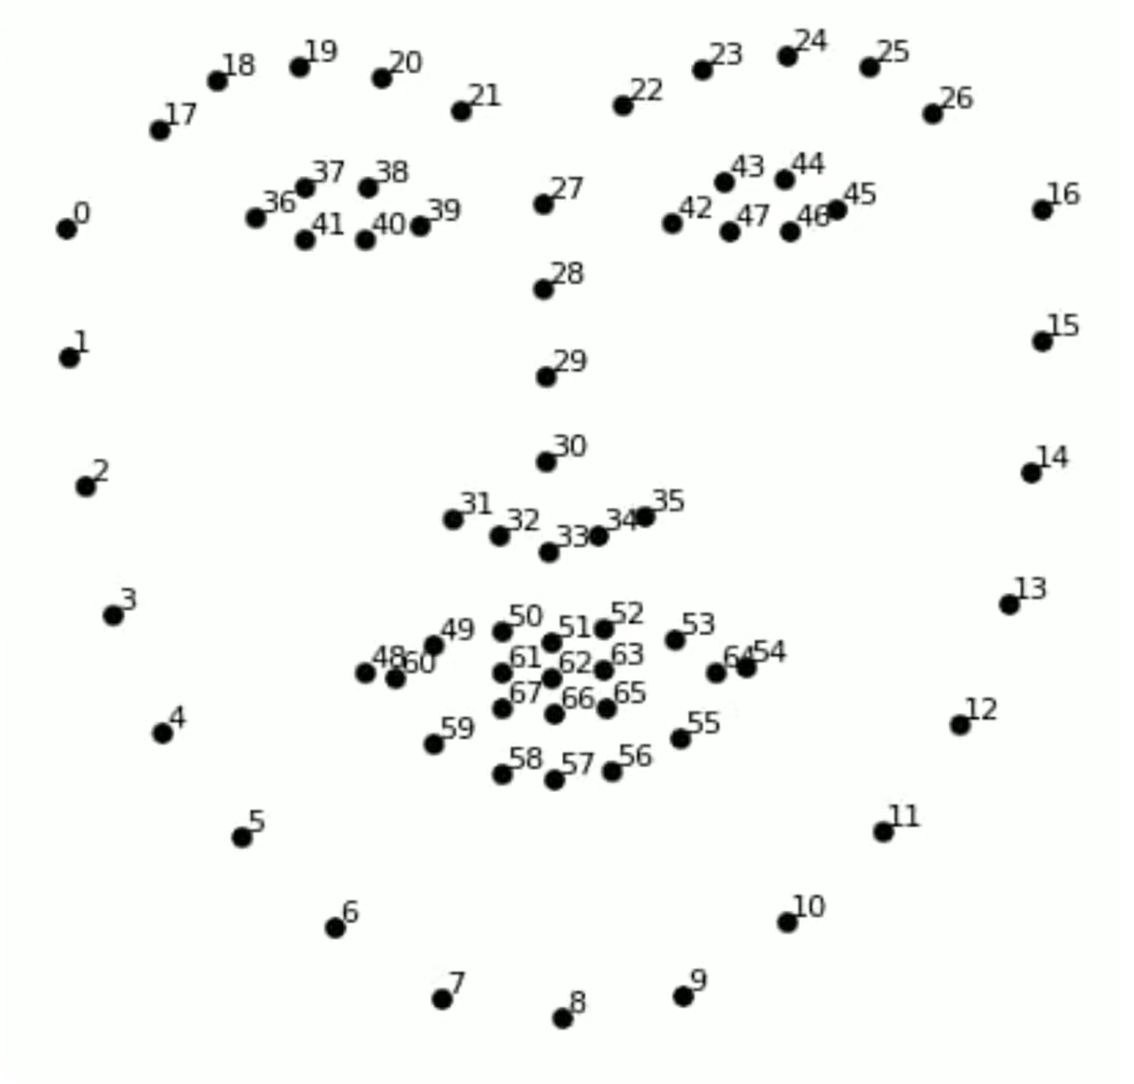

In [15]:
#status marking for current state
sleep = 0
drowsy = 0
active = 0
status=""
color=(0,0,0)

Setting the variables to null to measure the Drowsiness condition of the subject using the below specified methodology

In [16]:
def compute(ptA,ptB):
	dist = np.linalg.norm(ptA - ptB)# calculating the Euclidean distance
	return dist

This code snippet defines a function called *compute* that calculates the Euclidean distance between two points *ptA* and *ptB* using the *np.linalg.norm function* from the *NumPy* library.

#### Euclidean Distance
Euclidean distance is a measure of the straight-line distance between two points in a Euclidean space. It is the most commonly used distance metric to calculate the distance between two points in a Cartesian coordinate syste
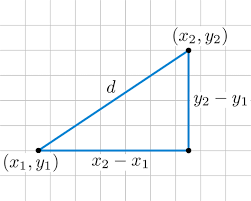
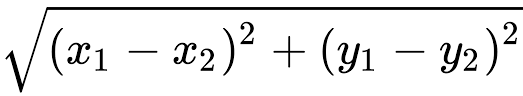

In [17]:
def blinked(a,b,c,d,e,f):
	up = compute(b,d) + compute(c,e)
	down = compute(a,f)
	ratio = up/(2.0*down)

	#Checking if it is blinked
	if(ratio>0.25):
		return 2 #active
	elif(ratio>0.15 and ratio<=0.25):
		return 1 #drowsy
	else:
		return 0 #sleeping

- ### blinked():
The function blinked takes 6 variables as inputs. These 6 inputs are the coordinates that are plotted on using the shape_predictor. For more clarity you can look up at the diagram given above to see the 6 landmarks that marks the eye which we will use to see if the eyes are closed or not. There are two distances that are calculated in the eyes. We can see using the reference from the eyes that (37,41) and (38,40) are the two short distances from the up and down of the eye and (36,39) is the long distance in the eye. 
 - ### up:
 This variable holds the sum of the short distances.
 - ### down:
 This variable holds the long distance
 - ### ratio:
 To normalize the distances and check whether the eyes are blinked or not we use calculate this ratio which will determine where the eyes are closed or not. 

So after calculating we get the ratio where it was seen based on many researches that 0.25 is the approximate value that can determine the value of an open eye or not and any value below it meant that either the person is feeling sleepy or is sleeping.

In [ ]:
while True:
    frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    #detected face in faces array
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()

        face_frame = frame.copy()
        cv2.rectangle(face_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        landmarks = predictor(gray, face)
        landmarks = face_utils.shape_to_np(landmarks)

        #The numbers are actually the landmarks which will show eye
        left_blink = blinked(landmarks[36],landmarks[37], 
        	landmarks[38], landmarks[41], landmarks[40], landmarks[39])
        right_blink = blinked(landmarks[42],landmarks[43], 
        	landmarks[44], landmarks[47], landmarks[46], landmarks[45])
        
        #Now judge what to do for the eye blinks
        if(left_blink==0 or right_blink==0):
            sleep+=1
            drowsy=0
            active=0
            if(sleep>6):
                status="SLEEPING !!!"
                color = (255,0,0)

        elif(left_blink==1 or right_blink==1):
            sleep=0
            active=0
            drowsy+=1
            if(drowsy>6):
                status="Drowsy !"
                color = (0,0,255)

        else:
            drowsy=0
            sleep=0
            active+=1
            if(active>6):
                status="Active :)"
                color = (0,255,0)
        	
        cv2.putText(frame, status, (100,100), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color,3)

        for n in range(0, 68):
            (x,y) = landmarks[n]
            cv2.circle(face_frame, (x, y), 1, (255, 255, 255), -1)

### Working:
- We first start capturing the face using the VideoCapture method and then run it for infinte amount of time. We also grayscale it using the cvtColor function so that we can pass it to detector function.
- The detector function detects the faces in the frames passed on to it and returns the details in an array with each element representing each face that was detected in the video frame.
- We then iterate through all the faces and for each frame we find:
 - The coordinates of the detected face and then save the coordinates in x1, y1, x2 & y2 and then plot the rectangle with the calculated coordinates.
 - Using the predictor functions plot and match the landmarks of on the face detected by the detector.
 - Set the right eye and left eye using the coordinates of the eye as seen in the landmarks image above and is sent to the blinked function to check if that eye blinked or not.
 - If the eye was close for a certain amount and for a certain time it will show drowsy or if fully closed will show sleeping.
 - Then put the respective text next to the frame and the video 
 - We plot the landmarks that are seen to us in the above image to the face of the subject in real time in a different video panel.
## The landmarks that are plotted.
 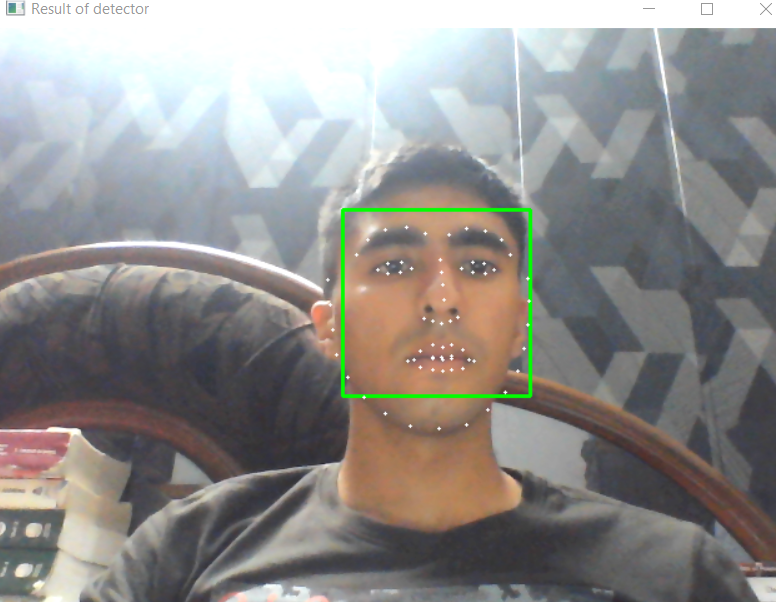
## Different Phases of the Detection
 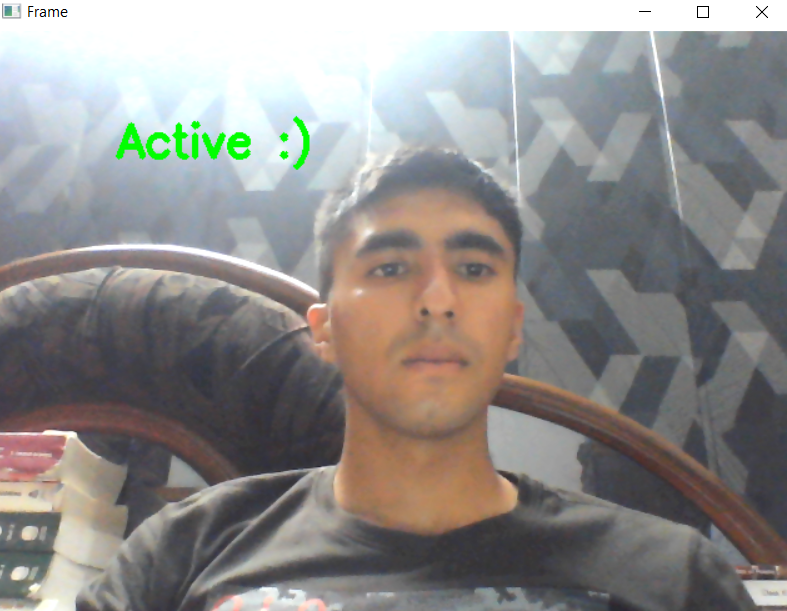
                                                            Awake
 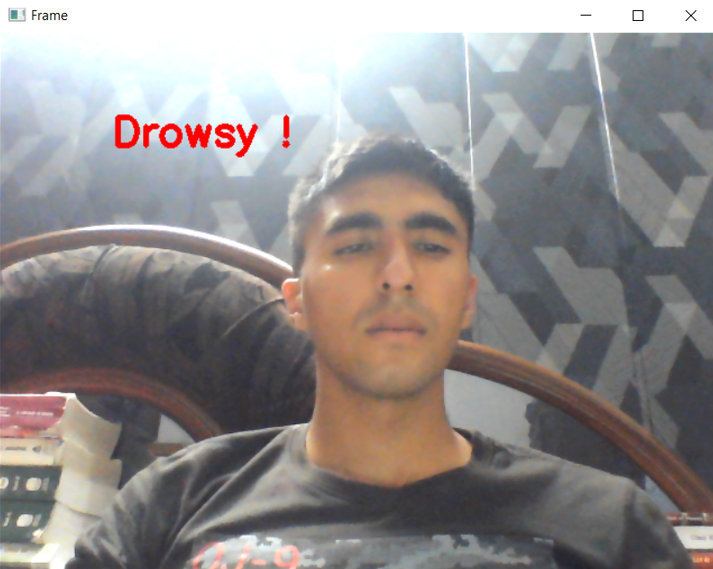
                                                            Drowsy
 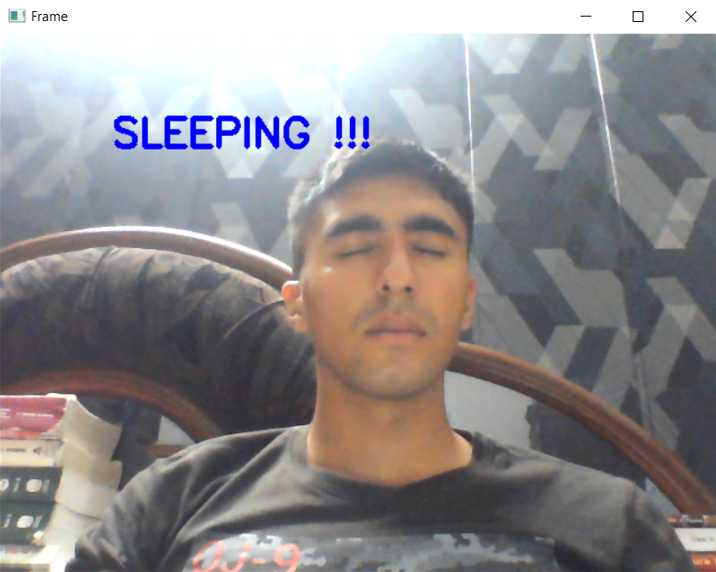
                                                            Sleepy

In [ ]:
    cv2.imshow("Frame", frame)
    cv2.imshow("Result of detector", face_frame)
    key = cv2.waitKey(1)
    if key == 27:
      	break

### Final Display:
At last we use the *imshow()* function to display the 2 frames for the Landmarks as well as the Current Drowsiness status of the Subject